# WeatherPy

### Analysis

* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests
import time
from citipy import citipy
from api_keys import weather_api_key

In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# set up lists to hold reponse info
name =[]
lat = []
lng =[]
temp = []
hum =[]
cloud =[]
wind =[]
country= []
date =[]
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("=============================")

for city in cities:
    response = requests.get(query_url + city).json()
    try:   
        print(f"Processing Record of {city}")
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print("City not found. Skipping...")
        pass

print("=============================")
print("Data Retrieval Complete")
print("=============================")

Beginning Data Retrieval
Processing Record of chokurdakh
Processing Record of punta arenas
Processing Record of port alfred
Processing Record of cherskiy
Processing Record of thinadhoo
Processing Record of dunedin
Processing Record of dikson
Processing Record of qaanaaq
Processing Record of luwuk
Processing Record of airai
Processing Record of rikitea
Processing Record of torbay
Processing Record of gladstone
Processing Record of cape town
Processing Record of new norfolk
Processing Record of talnakh
Processing Record of sambava
Processing Record of samusu
City not found. Skipping...
Processing Record of cidreira
Processing Record of doha
Processing Record of busselton
Processing Record of thayetmyo
Processing Record of ushuaia
Processing Record of avera
Processing Record of banmo
City not found. Skipping...
Processing Record of sechura
Processing Record of dzhebariki-khaya
Processing Record of albany
Processing Record of mataura
Processing Record of tapaua
City not found. Skipping...


Processing Record of harper
Processing Record of grand river south east
City not found. Skipping...
Processing Record of watertown
Processing Record of lisakovsk
Processing Record of tabiauea
City not found. Skipping...
Processing Record of effingham
Processing Record of douentza
Processing Record of mahebourg
Processing Record of bandipur
Processing Record of kloulklubed
Processing Record of zyryanka
Processing Record of phalaborwa
Processing Record of saint-augustin
Processing Record of matara
Processing Record of tomsk
Processing Record of bridgewater
Processing Record of luangwa
Processing Record of dingle
Processing Record of shediac
Processing Record of bengkulu
Processing Record of kavkazskiy
Processing Record of sita buzaului
Processing Record of piryion
City not found. Skipping...
Processing Record of dahuk
Processing Record of mandera
Processing Record of coquimbo
Processing Record of fort nelson
Processing Record of margate
Processing Record of shaoyang
Processing Record of 

Processing Record of uaua
Processing Record of santiago de cao
Processing Record of fort saint james
Processing Record of miguel alves
Processing Record of belmonte
Processing Record of vardo
Processing Record of quepos
Processing Record of bathsheba
Processing Record of verkhnevilyuysk
Processing Record of coihaique
Processing Record of gurupa
Processing Record of inhambane
Processing Record of amga
Processing Record of weligama
Processing Record of ucluelet
Processing Record of petersburg
Processing Record of andenes
Processing Record of bara
Processing Record of saint-pierre
Processing Record of olean
Processing Record of ipixuna
Processing Record of upington
Processing Record of adrar
Processing Record of kumbo
Processing Record of rosario
Processing Record of vaitupu
City not found. Skipping...
Processing Record of tungor
Processing Record of shiyan
Processing Record of kokopo
Processing Record of port augusta
Processing Record of satun
Processing Record of sept-iles
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_df = pd.DataFrame({"City":name, "Lat":lat, "Lng": lng,"Max Temp":temp, "Humidity":hum,
                   "Cloudiness":cloud,"Wind Speed":wind,"Country": country, "Date": date})
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.63,147.92,-7.76,90,94,4.54,RU,1605858270
1,Punta Arenas,-53.15,-70.92,48.20,76,75,4.70,CL,1605858124
2,Port Alfred,-33.59,26.89,69.31,53,4,12.39,ZA,1605858271
3,Cherskiy,68.75,161.30,2.95,95,100,0.98,RU,1605858271
4,Thinadhoo,0.53,72.93,82.49,67,100,4.32,MV,1605858271


In [10]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,20.953111,22.941564,54.893937,72.998243,52.725835,8.693357,1.605858e+09
std,33.589210,91.446432,25.627754,20.948419,41.267447,5.974352,8.569384e+01
min,-54.800000,-175.200000,-22.000000,8.000000,0.000000,0.340000,1.605858e+09
25%,-5.320000,-59.950000,35.600000,61.000000,1.000000,4.380000,1.605858e+09
50%,27.320000,27.850000,61.000000,78.000000,64.000000,6.930000,1.605858e+09
75%,48.930000,105.380000,75.990000,89.000000,98.000000,11.970000,1.605858e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,42.500000,1.605858e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
 #  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_df[(city_df["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.63,147.92,-7.76,90,94,4.54,RU,1605858270
1,Punta Arenas,-53.15,-70.92,48.20,76,75,4.70,CL,1605858124
2,Port Alfred,-33.59,26.89,69.31,53,4,12.39,ZA,1605858271
3,Cherskiy,68.75,161.30,2.95,95,100,0.98,RU,1605858271
4,Thinadhoo,0.53,72.93,82.49,67,100,4.32,MV,1605858271


In [16]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The code analyzes the relationships between max temperature and latitudes.


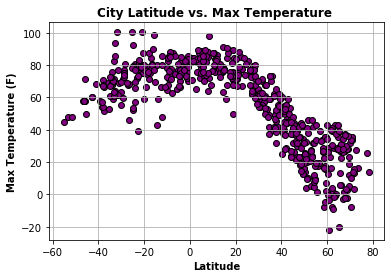

In [17]:
x_value = clean_city_data['Lat']
y_value = clean_city_data['Max Temp']
plt.scatter(x_value,y_value,marker="o", facecolors="purple", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("City Latitude vs. Max Temperature ",fontsize=12, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Max Temperature (F)", weight="bold")
plt.savefig("01_Latitude vs. Temperature Plot.png")
print("The code analyzes the relationships between max temperature and latitudes.")

## Latitude vs. Humidity Plot

The code analyzes the relationships between humidity and latitudes.


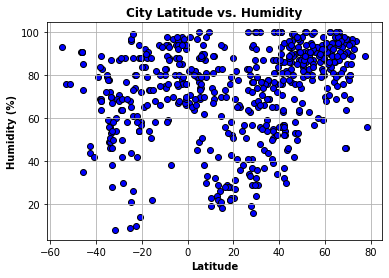

In [18]:
x_value = clean_city_data['Lat']
y_value = clean_city_data['Humidity']
plt.scatter(x_value,y_value,marker="o", facecolors="blue", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(0,105)
plt.title("City Latitude vs. Humidity",fontsize=12, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Humidity (%)", weight="bold")
plt.savefig("02_Latitude vs. Humidity Plot.png")
print("The code analyzes the relationships between humidity and latitudes.")

## Latitude vs. Cloudiness Plot

The code analyzes the relationships between cloudiness and latitudes.


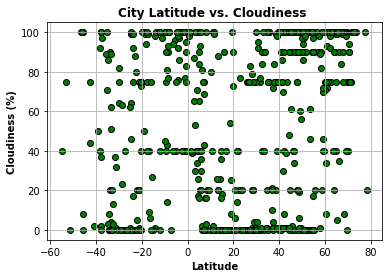

In [19]:
x_value = clean_city_data['Lat']
y_value = clean_city_data['Cloudiness']
plt.scatter(x_value,y_value,marker="o", facecolors="green", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-10,105)
plt.title("City Latitude vs. Cloudiness ",fontsize=12, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Cloudiness (%)", weight="bold")
plt.savefig("03_Latitude vs. Cloudiness Plot.png")
print("The code analyzes the relationships between cloudiness and latitudes.")

## Latitude vs. Wind Speed Plot

The code analyzes the relationships between wind speed and latitudes.


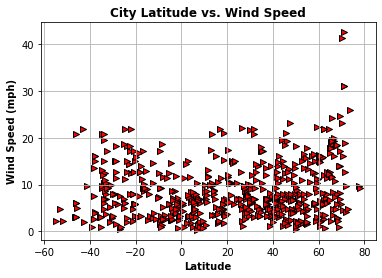

In [20]:
x_value = clean_city_data['Lat']
y_value = clean_city_data['Wind Speed']
plt.scatter(x_value,y_value,marker=">", facecolors="red", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(0,50)
plt.title("City Latitude vs. Wind Speed",fontsize=12, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Wind Speed (mph)", weight="bold")
plt.savefig("04_Latitude vs. Wind Speed Plot.png")
print("The code analyzes the relationships between wind speed and latitudes.")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7729912820736726.


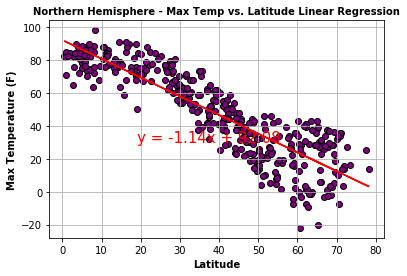

In [21]:
north_df = clean_city_data.loc[clean_city_data["Lat"] >= 0, :]

x_value = north_df['Lat']
y_value = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o", facecolors="purple", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Max Temperature (F)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(19,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("05_Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.21899357771709238.


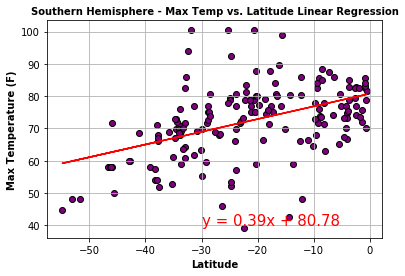

In [22]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0, :]

x_value = south_df['Lat']
y_value = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o", facecolors="purple", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Max Temperature (F)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("06_Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17152826762641682.


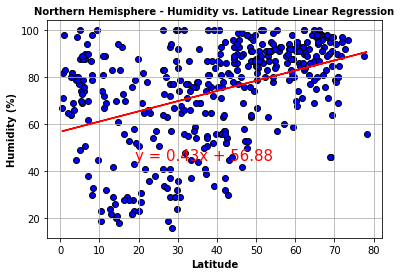

In [23]:
north_df = clean_city_data.loc[clean_city_data["Lat"] >= 0, :]

x_value = north_df['Lat']
y_value = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o", facecolors="blue", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Humidity (%)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(19,45),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("07_Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0795784691536018.


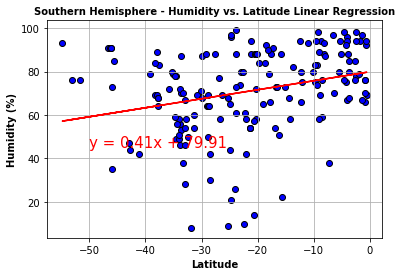

In [24]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0, :]

x_value = south_df['Lat']
y_value = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o", facecolors="blue", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Humidity (%)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("08_Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13431535486011376.


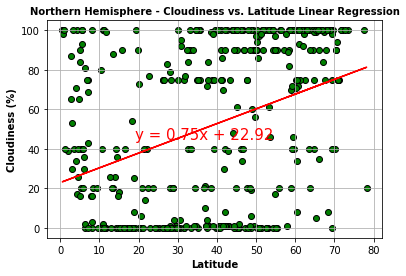

In [25]:
north_df = clean_city_data.loc[clean_city_data["Lat"] >= 0, :]

x_value = north_df['Lat']
y_value = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o", facecolors="green", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Cloudiness (%)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(19,45),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("09_Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13295745973380727.


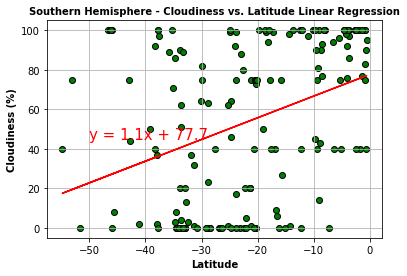

In [26]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0, :]

x_value = south_df['Lat']
y_value = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o", facecolors="green", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Cloudiness (%)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("10_Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07409098064830211.


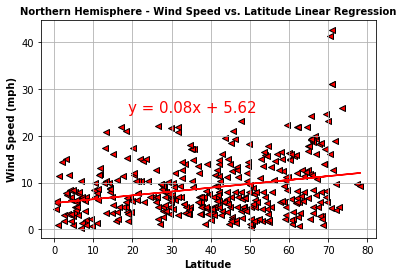

In [27]:
north_df = clean_city_data.loc[clean_city_data["Lat"] >= 0, :]

x_value = north_df['Lat']
y_value = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="<", facecolors="red", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Wind Speed (mph)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(19,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("11_Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.024552772268703525.


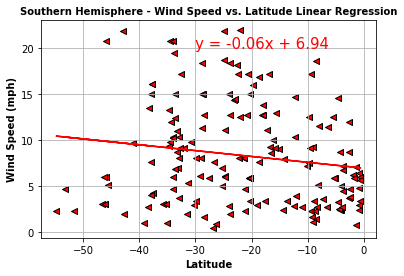

In [28]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0, :]

x_value = south_df['Lat']
y_value = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="<", facecolors="red", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Wind Speed (mph)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("12_Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")